In [1]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import matplotlib as plt
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import numpy as np
import warnings
import os

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [6]:
telecom=pd.read_csv("training_data.csv")
telecom.head()

,City,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,Los Angeles,Male,No,2,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
1,Los Angeles,Female,No,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
2,Los Angeles,Female,No,8,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
3,Los Angeles,Female,No,28,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
4,Los Angeles,Male,No,49,Yes,Fiber optic,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes


In [7]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Senior_Citizen    7043 non-null   object 
 3   Tenure_Months     7043 non-null   int64  
 4   Phone_Service     7043 non-null   object 
 5   Internet_Service  7043 non-null   object 
 6   Streaming TV      7043 non-null   object 
 7   Streaming Movies  7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   Payment Method    7043 non-null   object 
 10  Monthly Charges   7043 non-null   float64
 11  Total_Charges     7043 non-null   object 
 12  Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 715.4+ KB


In [8]:
telecom.isnull().sum()

City                0
Gender              0
Senior_Citizen      0
Tenure_Months       0
Phone_Service       0
Internet_Service    0
Streaming TV        0
Streaming Movies    0
Contract            0
Payment Method      0
Monthly Charges     0
Total_Charges       0
Churn               0
dtype: int64

<AxesSubplot: >

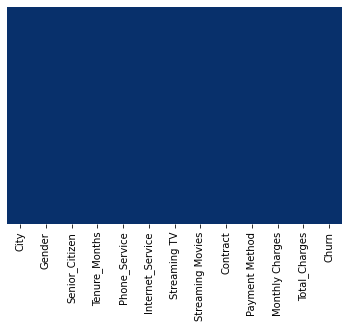

In [9]:
sns.heatmap(telecom.isnull(),yticklabels=False,cbar=False,cmap="Blues_r")

In [10]:
telecom['Total_Charges'] = pd.to_numeric(telecom['Total_Charges'],errors='coerce')
nan_cols = [i for i in telecom.columns if telecom[i].isnull().any()]
nan_cols
telecom.info()
telecom.shape
duplicateRows = telecom[telecom.duplicated()]
duplicateRows
def cat_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')
telecom.replace("No internet service","No",inplace=True)
cat_unique_col_values(telecom)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Senior_Citizen    7043 non-null   object 
 3   Tenure_Months     7043 non-null   int64  
 4   Phone_Service     7043 non-null   object 
 5   Internet_Service  7043 non-null   object 
 6   Streaming TV      7043 non-null   object 
 7   Streaming Movies  7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   Payment Method    7043 non-null   object 
 10  Monthly Charges   7043 non-null   float64
 11  Total_Charges     7032 non-null   float64
 12  Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 715.4+ KB
City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Gender: ['Male' 'Female

In [11]:
nan_cols = [i for i in telecom.columns if telecom[i].isnull().any()]
nan_cols

['Total_Charges']

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Senior_Citizen    7043 non-null   object 
 3   Tenure_Months     7043 non-null   int64  
 4   Phone_Service     7043 non-null   object 
 5   Internet_Service  7043 non-null   object 
 6   Streaming TV      7043 non-null   object 
 7   Streaming Movies  7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   Payment Method    7043 non-null   object 
 10  Monthly Charges   7043 non-null   float64
 11  Total_Charges     7032 non-null   float64
 12  Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 715.4+ KB


In [13]:
telecom.shape

(7043, 13)

In [14]:
duplicateRows = telecom[telecom.duplicated()]
duplicateRows

,City,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn


In [15]:
def cat_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [16]:
telecom.replace("No internet service","No",inplace=True)

In [17]:
cat_unique_col_values(telecom)

City: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Gender: ['Male' 'Female']
Senior_Citizen: ['No' 'Yes']
Phone_Service: ['Yes' 'No']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Streaming TV: ['No' 'Yes']
Streaming Movies: ['No' 'Yes']
Contract: ['Month-to-month' 'Two year' 'One year']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['Yes' 'No']


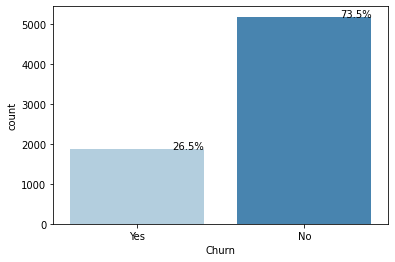

In [18]:
ax = sns.countplot(x="Churn", data=telecom, palette="Blues")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [19]:
import matplotlib.ticker as mtick  #for shpwing in pie chart form

Text(0.5, 1.0, 'percentage of Senior_Citizens')

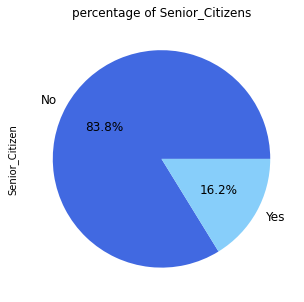

In [20]:
ax = (telecom['Senior_Citizen'].value_counts()*100.0 /len(telecom)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5),colors=['royalblue','lightskyblue'], fontsize = 12 )                                                                           
ax.set_title('percentage of Senior_Citizens', fontsize = 12)

Text(0.5, 1.0, 'percentage of gender')

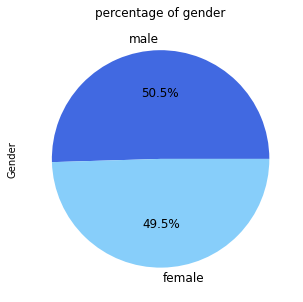

In [21]:
ax = (telecom['Gender'].value_counts()*100.0 /len(telecom)).plot.pie(autopct='%.1f%%', labels = ['male', 'female'],figsize =(5,5),colors=['royalblue','lightskyblue'], fontsize = 12 )                                                                           
ax.set_title('percentage of gender', fontsize = 12)

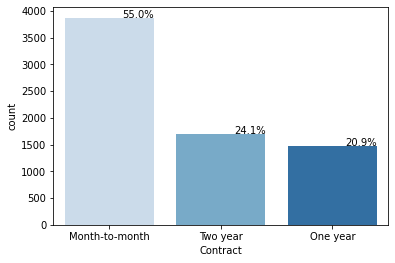

In [22]:
ax = sns.countplot(x="Contract", data=telecom, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')
plt.show()

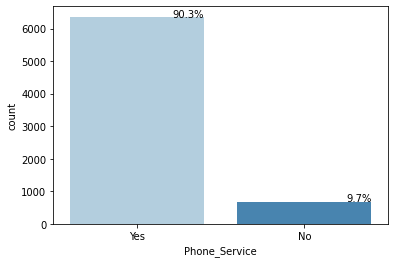

In [23]:
ax = sns.countplot(x="Phone_Service", data=telecom, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [24]:
services=['Tenure_Months','phone_Service','Internet_Service','Streaming TV','Streaming Movies','Payment Method','Monthly Charges']

In [25]:
# Services=['Tenure_Months','Phone_Service','Internet_Service','Streaming TV','Streaming Movies','Payment Method','Monthly Charges','City','Gender']
# fig, axes= plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
# for i, item in enumerate(Services):
#   if i < 3:
#     ax = sns.countplot(x=telecom[item], data=telecom, palette="Blues",ax=axes[i,0])
#     for p in ax.patches:
#       percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
#       x = p.get_x() + p.get_width()
#       y = p.get_height()
#       ax.annotate(percentage, (x, y),ha='right')        
#   elif i >=3 and i < 6:
#     ax = sns.countplot(x=telecom[item], data=telecom, palette="Blues",ax=axes[i-3,1])
#     for p in ax.patches:
#       percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
#       x = p.get_x() + p.get_width()
#       y = p.get_height()
#       ax.annotate(percentage, (x, y),ha='right') 
#   elif i < 9:
#     ax = sns.countplot(x=telecom[item], data=telecom, palette="Blues",ax=axes[i-6,2])  
#     for p in ax.patches:
#       percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
#       x = p.get_x() + p.get_width()
#       y = p.get_height()
#       ax.annotate(percentage, (x, y),ha='right') 



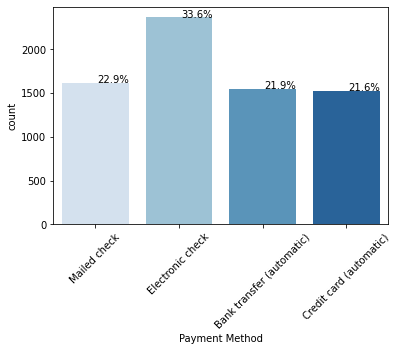

In [26]:
ax = sns.countplot(x="Payment Method", data=telecom, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(telecom))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right') 

C:\Users\Acer\AppData\Local\Temp\ipykernel_13360\2273133419.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom['Tenure_Months'], hist=True, kde=False, bins=int(180/5), color = 'royalblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})


Text(0.5, 1.0, 'no of Customers by their tenure')

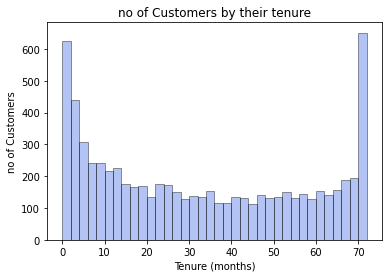

In [27]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
ax = sns.distplot(telecom['Tenure_Months'], hist=True, kde=False, bins=int(180/5), color = 'royalblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('no of Customers by their tenure')

C:\Users\Acer\AppData\Local\Temp\ipykernel_13360\1728005760.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom[telecom['Contract']=='Month-to-month']['Tenure_Months'],
C:\Users\Acer\AppData\Local\Temp\ipykernel_13360\1728005760.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distp

Text(0.5, 1.0, 'Two Year Contract')

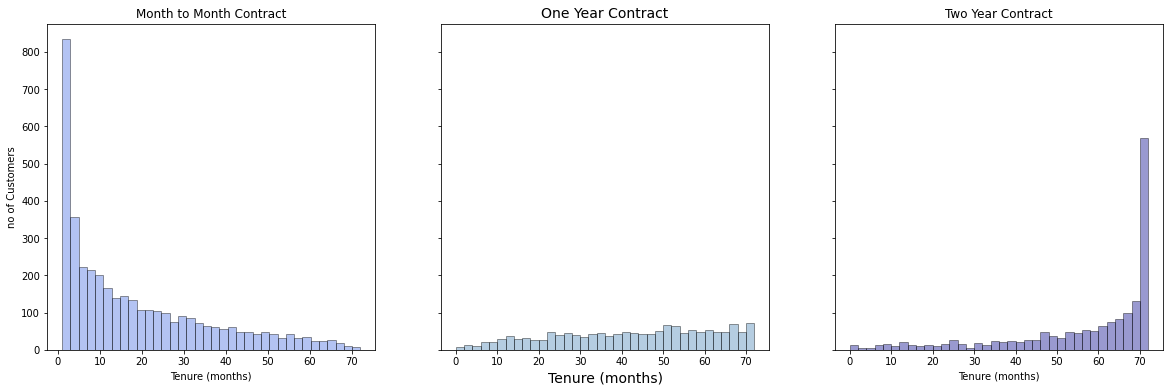

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom[telecom['Contract']=='Month-to-month']['Tenure_Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'royalblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')
ax = sns.distplot(telecom[telecom['Contract']=='One year']['Tenure_Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom[telecom['Contract']=='Two year']['Tenure_Months'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

<AxesSubplot: xlabel='Monthly Charges', ylabel='Count'>

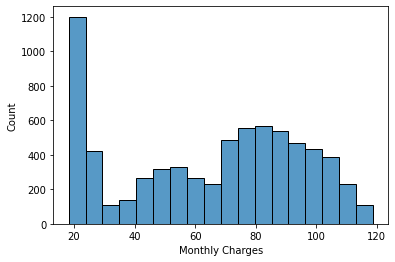

In [29]:
sns.histplot(data=telecom, x="Monthly Charges")

<AxesSubplot: xlabel='Total_Charges'>

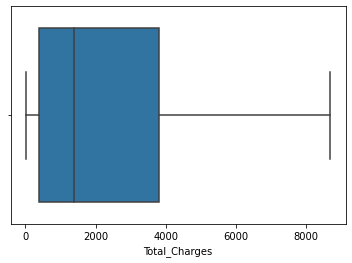

In [30]:
sns.boxplot(x=telecom['Total_Charges'])

<AxesSubplot: xlabel='Monthly Charges'>

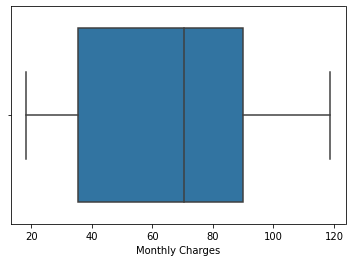

In [31]:
sns.boxplot(x=telecom['Monthly Charges'])

<AxesSubplot: xlabel='Tenure_Months'>

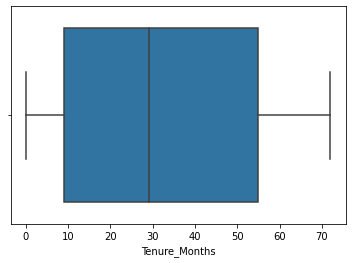

In [32]:
sns.boxplot(x=telecom['Tenure_Months'])

<AxesSubplot: xlabel='Monthly Charges', ylabel='Total_Charges'>

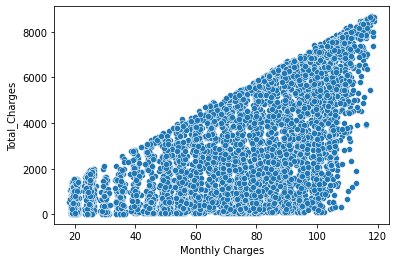

In [33]:
sns.scatterplot(data=telecom, x="Monthly Charges", y="Total_Charges")

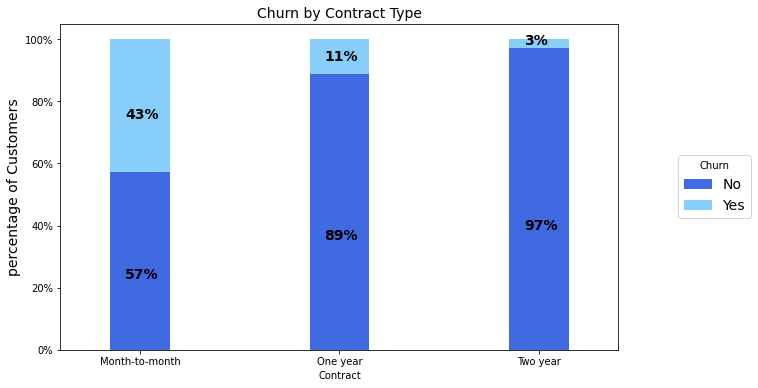

In [34]:
colors = ['royalblue','lightskyblue']
contract_churn = telecom.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center right',prop={'size':14},title = 'Churn', bbox_to_anchor=(1.25, 0.5))
ax.set_ylabel('percentage of Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

#to labels on the bar we have following code
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size = 14)

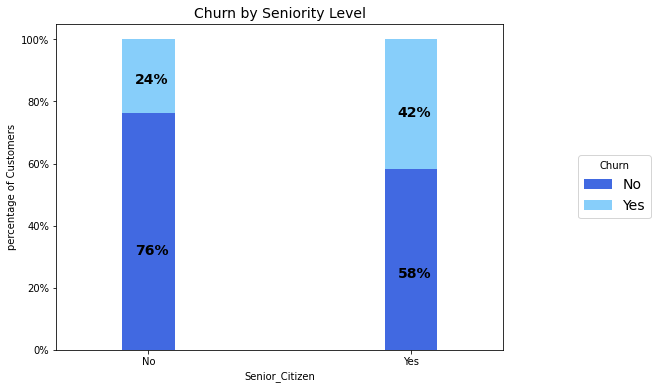

In [35]:
seniority_churn = telecom.groupby(['Senior_Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0,  figsize = (8,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn',bbox_to_anchor=(1.25, 0.5))
ax.set_ylabel('percentage of Customers')
ax.set_title('Churn by Seniority Level',size = 14)
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size =14)


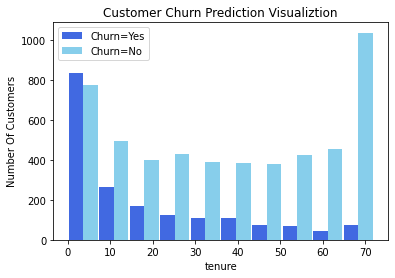

In [36]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
tenure_churn_no = telecom[telecom.Churn=='No'].Tenure_Months
tenure_churn_yes = telecom[telecom.Churn=='Yes'].Tenure_Months

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['royalblue','skyblue'],label=['Churn=Yes','Churn=No'])
plt.legend()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13360\3440478367.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom.Total_Charges[(telecom["Churn"] == 'No') ], color="royalblue", shade = True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_13360\3440478367.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom.Total_Charges[(telecom["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)


Text(0.5, 1.0, 'Distribution of total charges by churn')

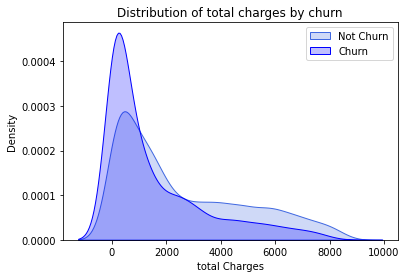

In [37]:
ax = sns.kdeplot(telecom.Total_Charges[(telecom["Churn"] == 'No') ], color="royalblue", shade = True)
ax = sns.kdeplot(telecom.Total_Charges[(telecom["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('total Charges')
ax.set_title('Distribution of total charges by churn')

In [38]:
telecom.shape
telecom.drop("City", axis=1, inplace=True)
telecom.tail(10)


,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
7033,Female,No,2,Yes,No,No,No,Month-to-month,Mailed check,20.05,39.25,No
7034,Male,Yes,55,Yes,DSL,No,No,One year,Credit card (automatic),60.00,3316.10,No
7035,Male,No,38,Yes,Fiber optic,No,No,Month-to-month,Credit card (automatic),69.50,2625.25,No
7036,Male,No,19,Yes,Fiber optic,Yes,No,Month-to-month,Bank transfer (automatic),78.70,1495.10,No
7037,Female,No,12,No,DSL,Yes,Yes,One year,Electronic check,60.65,743.30,No
7038,Female,No,72,Yes,No,No,No,Two year,Bank transfer (automatic),21.15,1419.40,No
7039,Male,No,24,Yes,DSL,Yes,Yes,One year,Mailed check,84.80,1990.50,No
7040,Female,No,72,Yes,Fiber optic,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No
7041,Female,No,11,No,DSL,No,No,Month-to-month,Electronic check,29.60,346.45,No
7042,Male,No,66,Yes,Fiber optic,Yes,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [39]:
 from pandas_profiling import ProfileReport
 profile = ProfileReport(telecom)
 profile.to_file(output_file="churnprofile01.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
! pip install sweetviz


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import sweetviz as sv
analyze_report = sv.analyze(telecom)
analyze_report.show_html('analyze.html', open_browser=False)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .item

Report analyze.html was generated.



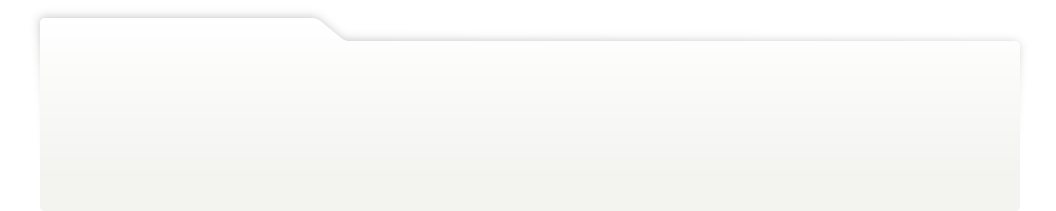
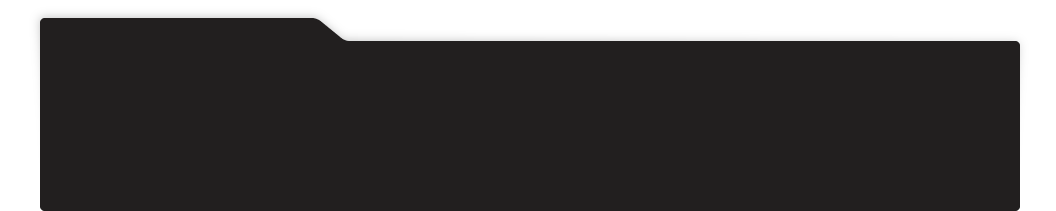
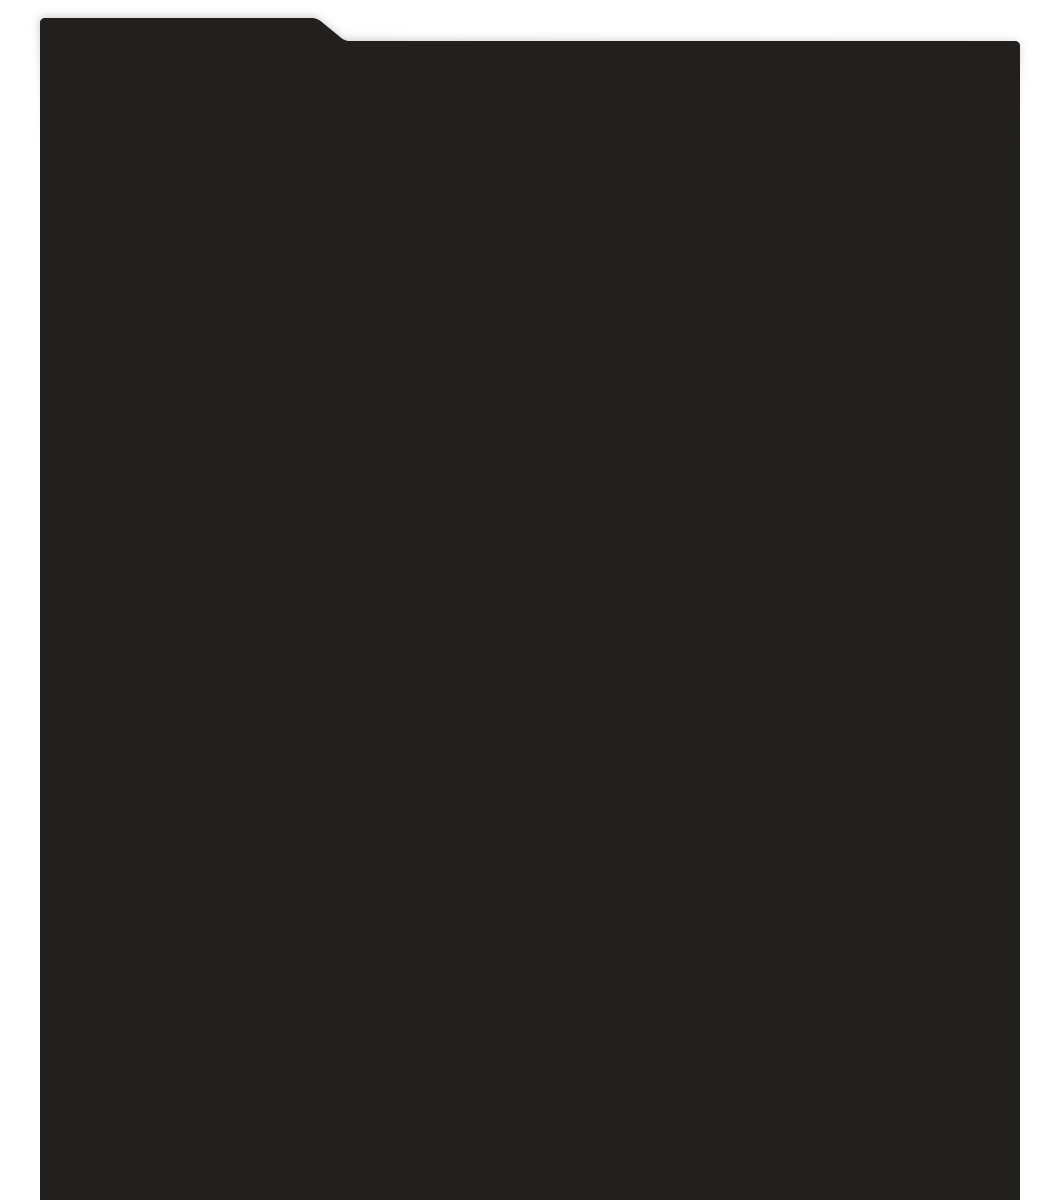
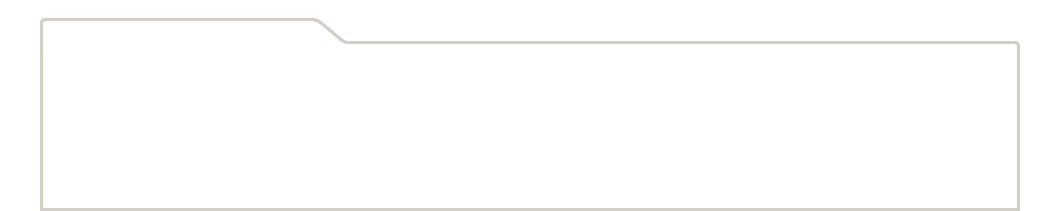
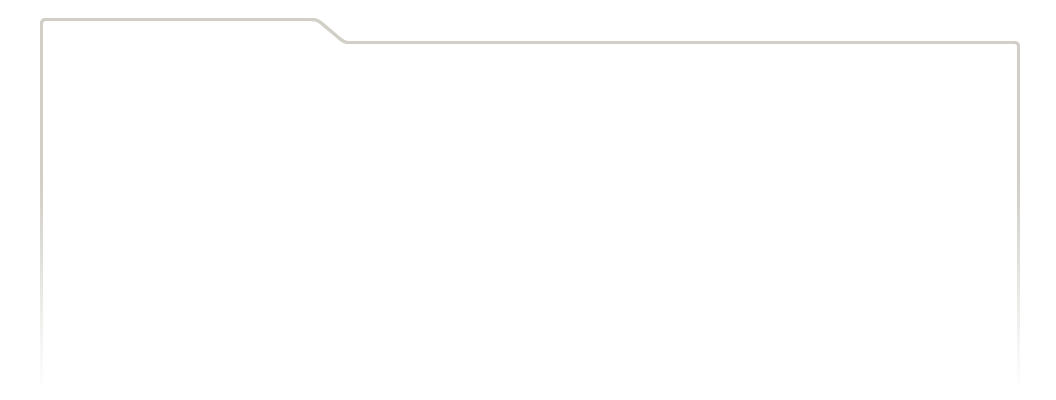
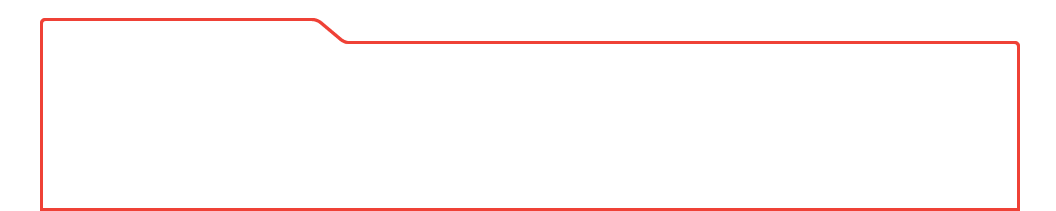
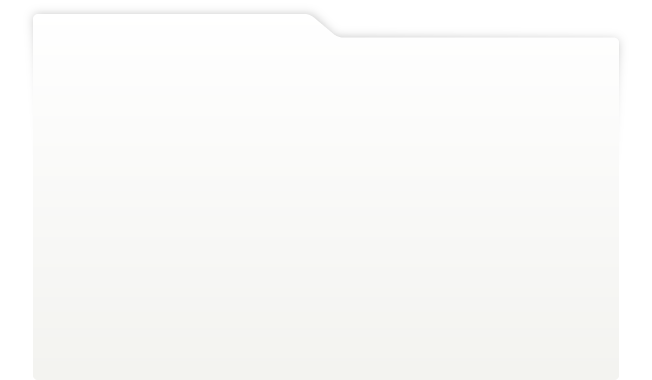
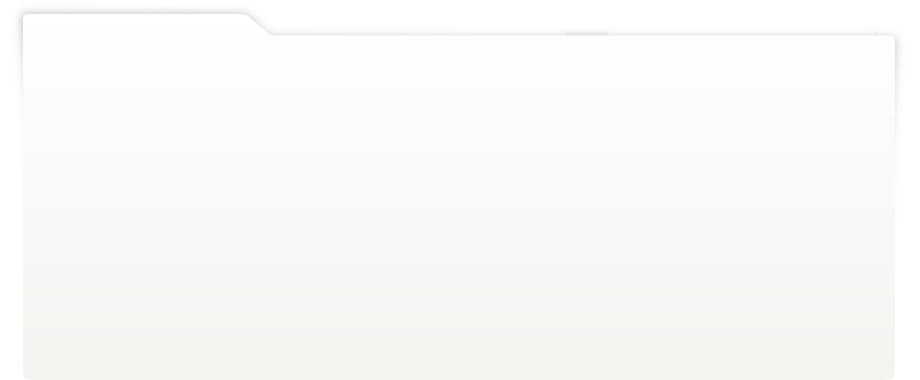
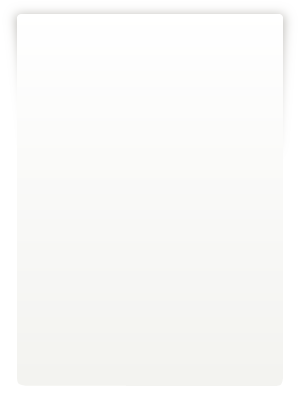
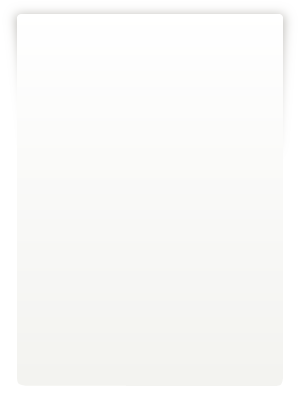
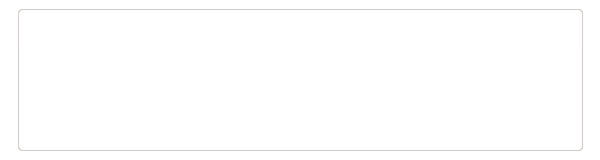
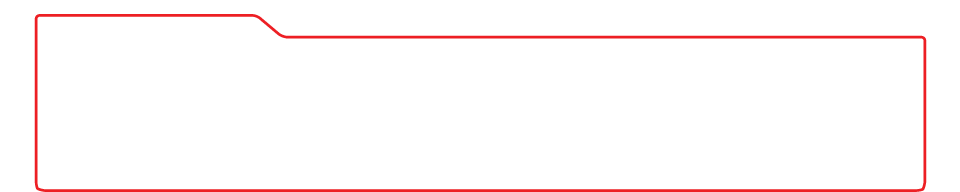
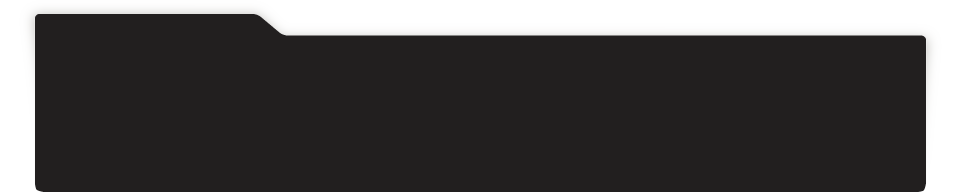
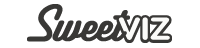
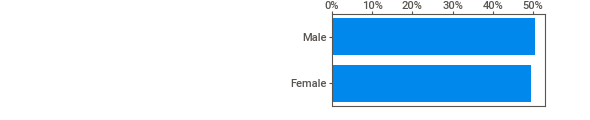
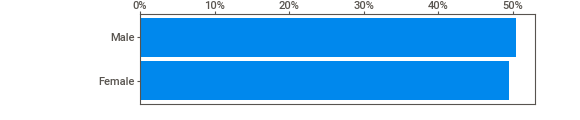
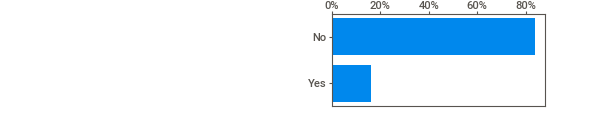
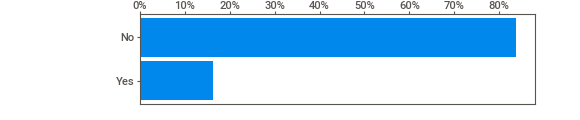
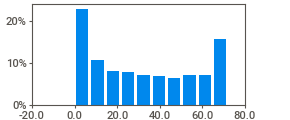
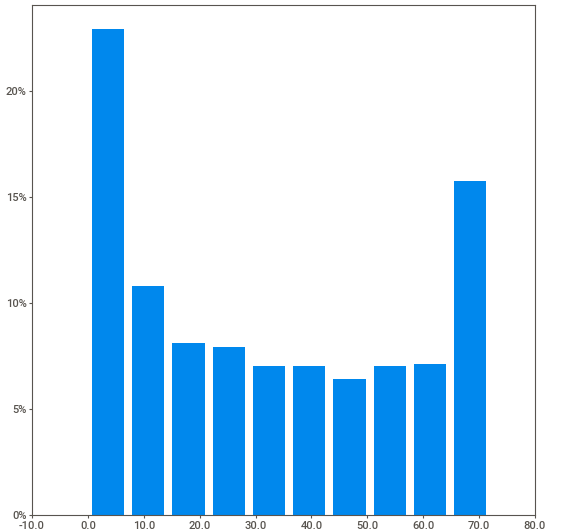
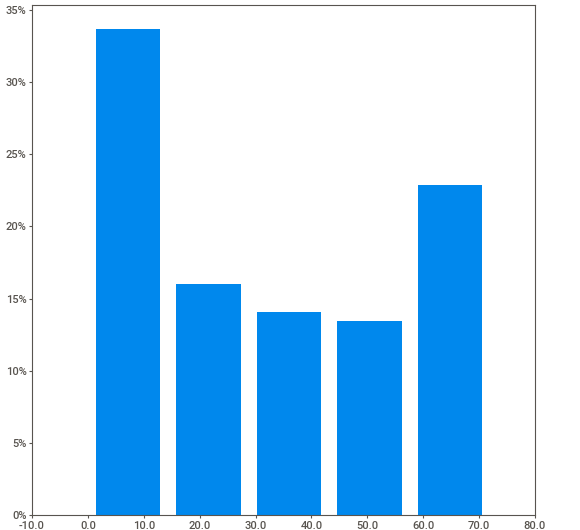
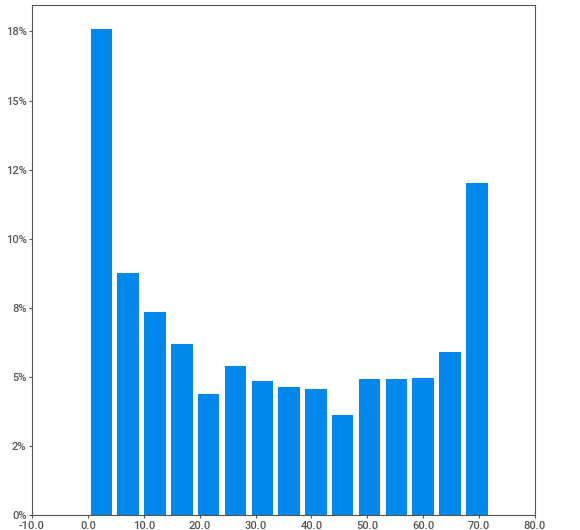
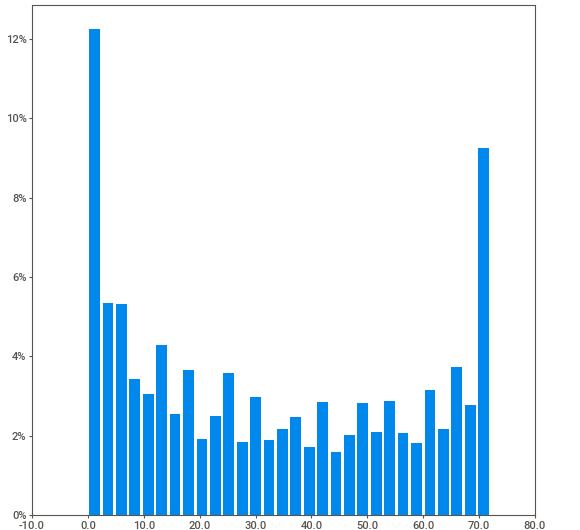
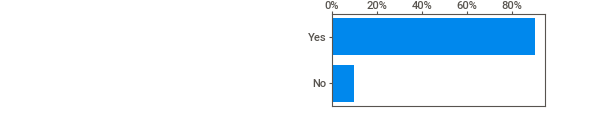
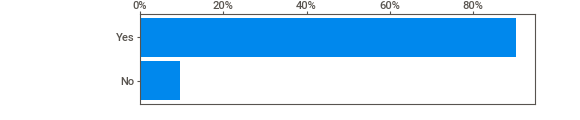
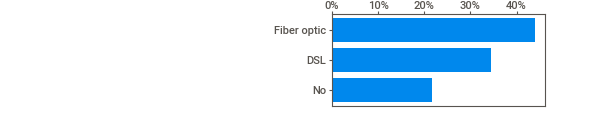
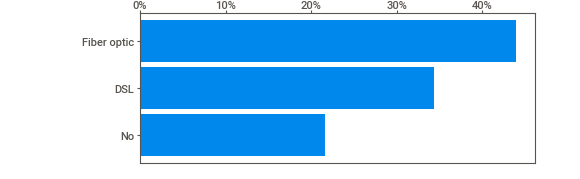
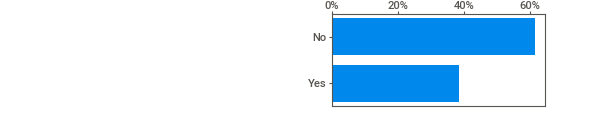
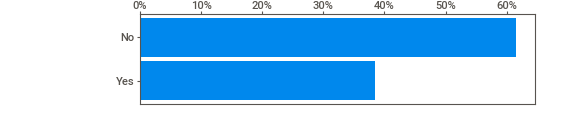
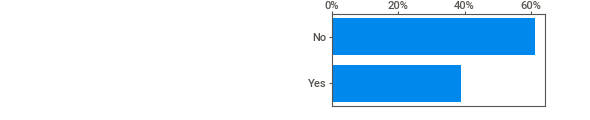
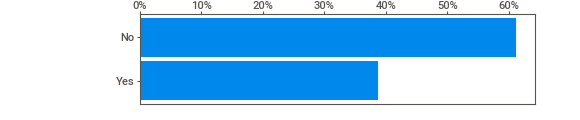
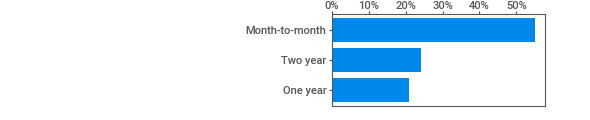
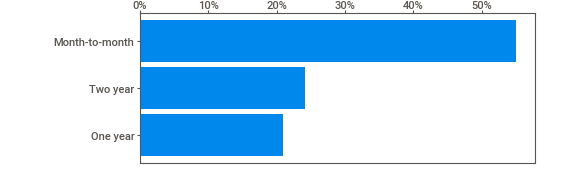
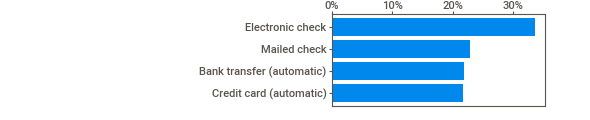
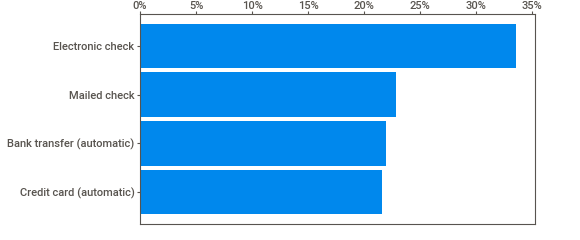
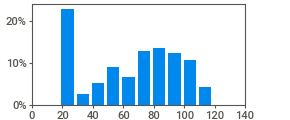
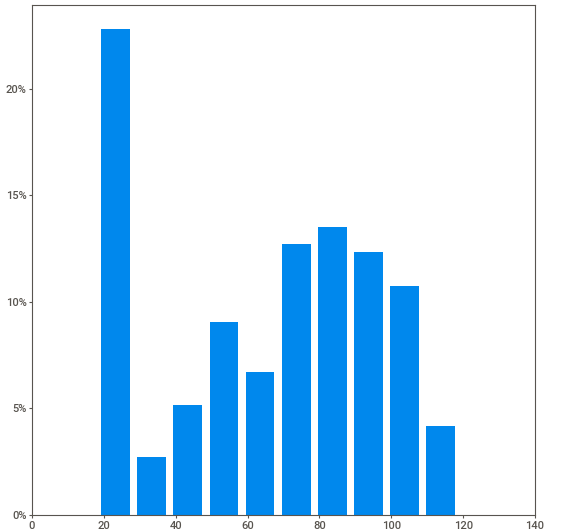
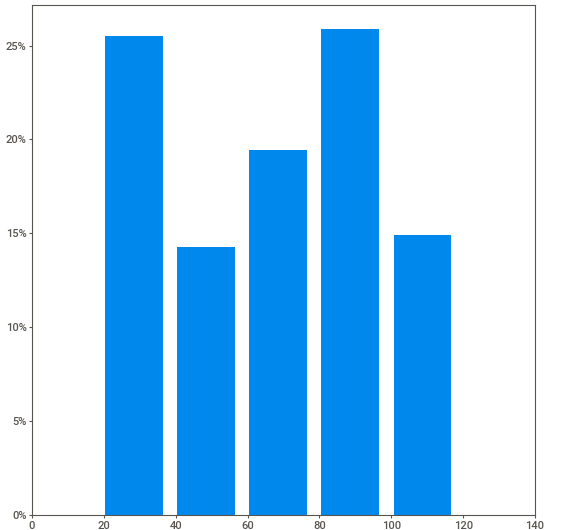
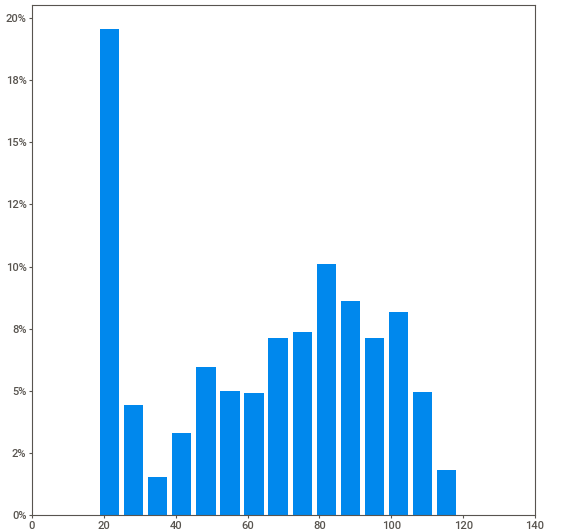
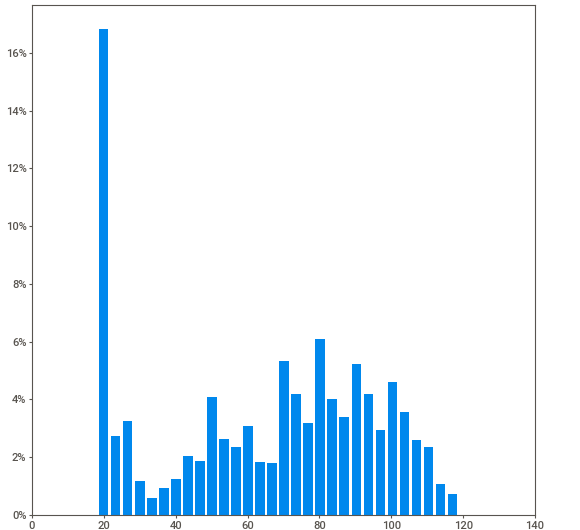
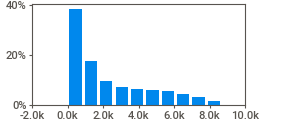
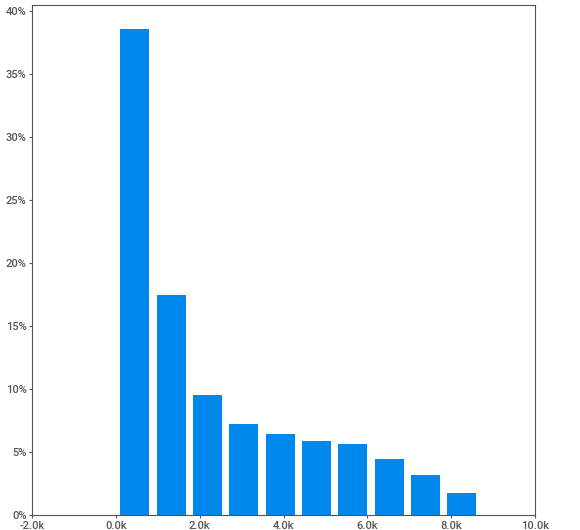
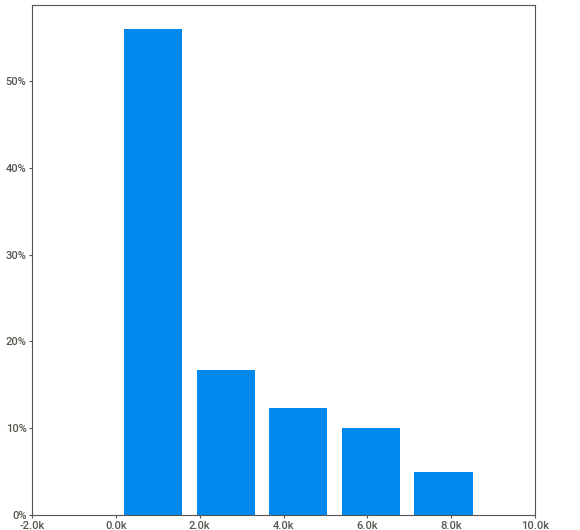
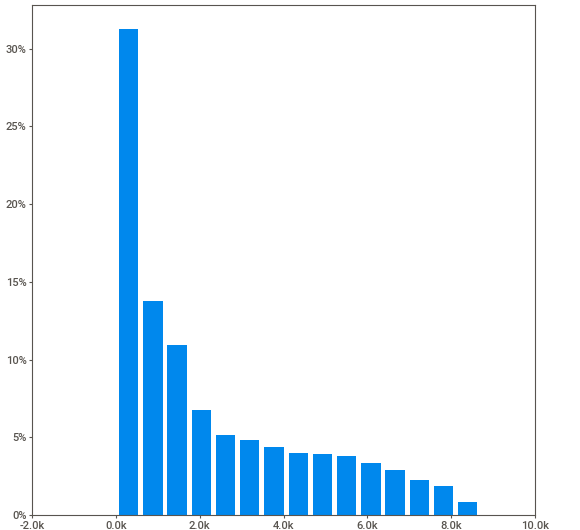
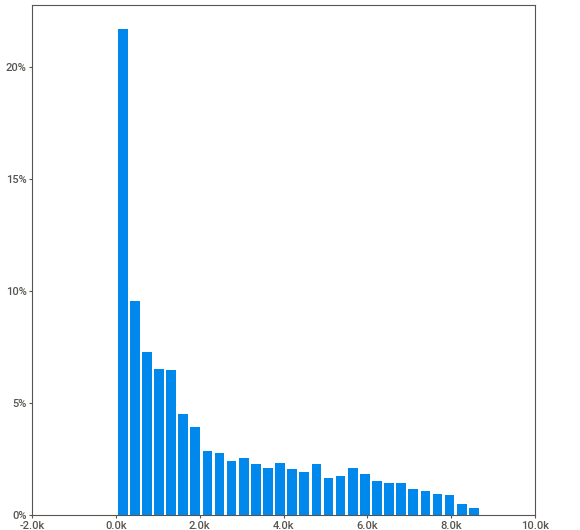
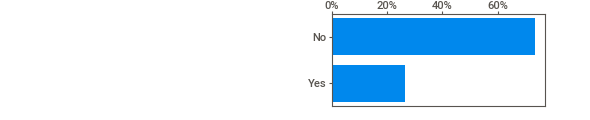
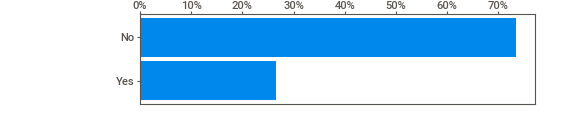
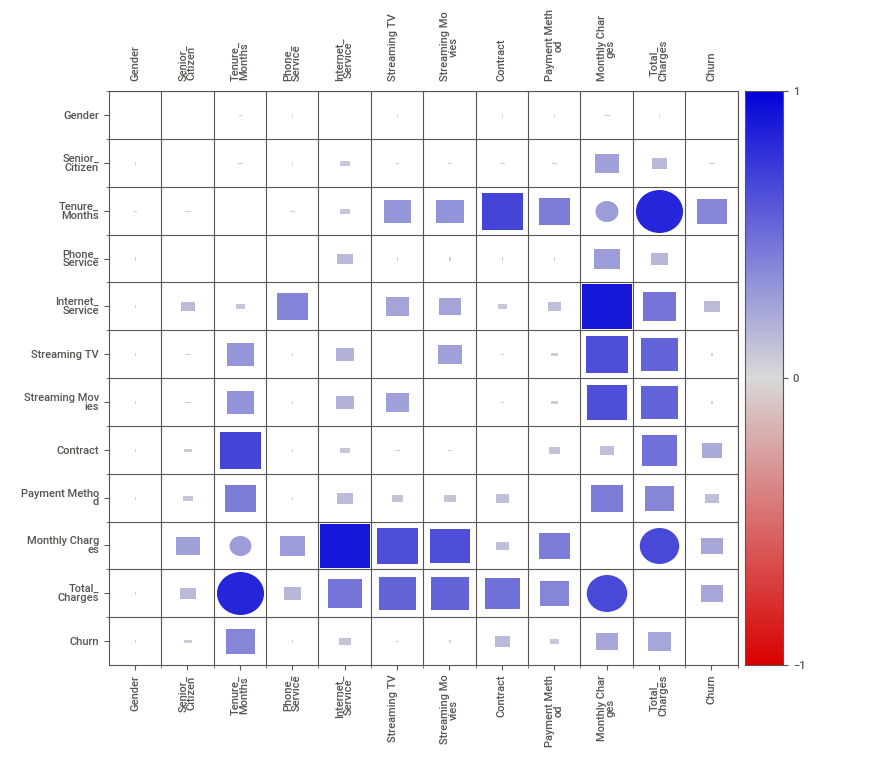
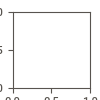

In [42]:
import IPython
IPython.display.HTML('analyze.html')

In [43]:
for col in telecom.columns:
    print(f"{col}: {telecom[col].nunique()} unique values")


Gender: 2 unique values
Senior_Citizen: 2 unique values
Tenure_Months: 73 unique values
Phone_Service: 2 unique values
Internet_Service: 3 unique values
Streaming TV: 2 unique values
Streaming Movies: 2 unique values
Contract: 3 unique values
Payment Method: 4 unique values
Monthly Charges: 1585 unique values
Total_Charges: 6530 unique values
Churn: 2 unique values


In [44]:
for col in telecom.columns:
    if telecom[col].dtype == 'object':
        telecom[col], _ = pd.factorize(telecom[col])

telecom.tail(10)

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
7033,1,0,2,0,2,0,0,0,0,20.05,39.25,1
7034,0,1,55,0,0,0,0,2,3,60.00,3316.10,1
7035,0,0,38,0,1,0,0,0,3,69.50,2625.25,1
7036,0,0,19,0,1,1,0,0,2,78.70,1495.10,1
7037,1,0,12,1,0,1,1,2,1,60.65,743.30,1
7038,1,0,72,0,2,0,0,1,2,21.15,1419.40,1
7039,0,0,24,0,0,1,1,2,0,84.80,1990.50,1
7040,1,0,72,0,1,1,1,2,3,103.20,7362.90,1
7041,1,0,11,1,0,0,0,0,1,29.60,346.45,1
7042,0,0,66,0,1,1,1,1,2,105.65,6844.50,1


In [45]:
telecom.head(10)

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,0,0,2,0,0,0,0,0,0,53.85,108.15,0
1,1,0,2,0,1,0,0,0,1,70.70,151.65,0
2,1,0,8,0,1,1,1,0,1,99.65,820.50,0
3,1,0,28,0,1,1,1,0,1,104.80,3046.05,0
4,0,0,49,0,1,1,1,0,2,103.70,5036.30,0
5,1,0,10,0,0,0,0,0,3,55.20,528.35,0
6,0,1,1,1,0,0,1,0,1,39.65,39.65,0
7,0,0,1,0,2,0,0,0,0,20.15,20.15,0
8,0,0,47,0,1,1,1,0,1,99.35,4749.15,0
9,0,0,1,1,0,0,0,0,1,30.20,30.20,0


In [46]:
 from pandas_profiling import ProfileReport
 profile = ProfileReport(telecom)
 profile.to_file(output_file="churnprofile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [48]:
for col in telecom.columns:
    print(f"{col}: {telecom[col].nunique()} unique values")

Gender: 2 unique values
Senior_Citizen: 2 unique values
Tenure_Months: 73 unique values
Phone_Service: 2 unique values
Internet_Service: 3 unique values
Streaming TV: 2 unique values
Streaming Movies: 2 unique values
Contract: 3 unique values
Payment Method: 4 unique values
Monthly Charges: 1585 unique values
Total_Charges: 6530 unique values
Churn: 2 unique values


In [49]:
for col in telecom.columns:
    if telecom[col].dtype == 'object':
        telecom[col], _ = pd.factorize(telecom[col])

telecom.tail(10)
telecom.head()

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,0,0,2,0,0,0,0,0,0,53.85,108.15,0
1,1,0,2,0,1,0,0,0,1,70.70,151.65,0
2,1,0,8,0,1,1,1,0,1,99.65,820.50,0
3,1,0,28,0,1,1,1,0,1,104.80,3046.05,0
4,0,0,49,0,1,1,1,0,2,103.70,5036.30,0


In [50]:
telecom.tail()

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
7038,1,0,72,0,2,0,0,1,2,21.15,1419.40,1
7039,0,0,24,0,0,1,1,2,0,84.80,1990.50,1
7040,1,0,72,0,1,1,1,2,3,103.20,7362.90,1
7041,1,0,11,1,0,0,0,0,1,29.60,346.45,1
7042,0,0,66,0,1,1,1,1,2,105.65,6844.50,1


In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = telecom.drop('Churn',axis=1)
y = telecom['Churn']
# devide the dataset into train and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(y_test,lrpred))
print("\n")
print("confusion matrix for logistic regression")
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test,cmap="Blues")


# new_data = pd.DataFrame({'Gender': 'Male', 
#                          'Senior_Citizen': 'Yes', 
#                          'Tenure_Months': 15,
#                          'Phone_Service': 'No',
#                          'Internet_Service': 'DSL',
#                          'Streaming TV': 'No',
#                          'Streaming Movies': 'No',
#                          'Contract': 'Month-to-month',
#                          'Payment Method': 'Bank transfer (automatic)',
#                          'Monthly Charges': 302,
#                          'Total_Charges': 568})

# for col in new_data.columns:
#     if new_data[col].dtype == 'object':
#         new_data[col], _ = pd.factorize(new_data[col])
# new_prediction = rf.predict(new_data)
# print(new_prediction)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test,dtpred))
print("\n")
print("confusion matrix for decision tree classifier")
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test,cmap="Blues")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1234)
new_data = pd.DataFrame({'Gender': ['Male'], 
                         'Senior_Citizen': ['No'], 
                         'Tenure_Months': [2],
                         'Phone_Service': ['DSL'],
                         'Internet_Service': ['No'],
                         'Streaming TV': ['No'],
                         'Streaming Movies': ['No'],
                         'Contract': ['Month-to-month'],
                         'Payment Method': ['Mailed check'],
                         'Monthly Charges': [53],
                         'Total_Charges': [108]})

# Check for missing values
if new_data.isnull().sum().sum() > 0:
    print("There are missing values in the new data.")
else:
    # One-Hot Encoding for categorical variables
    for col in new_data.columns:
        if new_data[col].dtype == 'object':
            new_data[col], _ = pd.factorize(new_data[col])
    
    # Ensure the same columns are present in the new data as in the training data
    missing_cols = set(X_train.columns) - set(new_data.columns)
    for c in missing_cols:
        new_data[c] = 0
    new_data = new_data[X_train.columns]
    
    rf.fit(X_train, y_train) # fit the model with X_train and y_train
    new_prediction = rf.predict(new_data)

    # Predict the churn status
    new_prediction = rf.predict(new_data)
    print(new_prediction)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

telecom.dropna(inplace=True)

# Split data into training and testing sets
X = telecom.drop('Churn', axis=1)
# print(X)
y = telecom['Churn']
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(y_test,rfpred))
print("\n")
print("confusion matrix for random forest classifier")
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test,cmap="Blues")



new_data = pd.DataFrame({'Gender': 'Female', 
                         'Senior_Citizen': 'No', 
                         'Tenure_Months': 28,
                         'Phone_Service': 'Yes',
                         'Internet_Service': 'Fiber optic',
                         'Streaming TV': 'Yes',
                         'Streaming Movies': 'Yes',
                         'Contract': 'Month-to-month',
                         'Payment Method': 'Electronic check',
                         'Monthly Charges': 104.8,
                         'Total_Charges': 3046.05}, index=[0])


# Map categorical columns
new_data['Gender'] = new_data['Gender'].map({'Male': 0, 'Female': 1})
new_data['Senior_Citizen'] = new_data['Senior_Citizen'].map({'Yes': 1, 'No': 0})
new_data['Phone_Service'] = new_data['Phone_Service'].map({'Yes': 1, 'No': 0})
new_data['Internet_Service'] = new_data['Internet_Service'].map({'No': 2, 'DSL': 0, 'Fiber optic': 1})
new_data['Contract'] = new_data['Contract'].map({'Month-to-month': 0, 'One year': 2, 'Two year': 1})
new_data['Payment Method'] = new_data['Payment Method'].map({'Mailed check': 0, 'Credit card (automatic)': 3, 'Bank transfer (automatic)': 2, 'Electronic check': 1})
new_data['Streaming TV'] = new_data['Streaming TV'].map({'Yes': 1, 'No': 0})
new_data['Streaming Movies'] = new_data['Streaming Movies'].map({'Yes': 1, 'No': 0})

print(new_data)
# Predict the target variable
new_prediction = rf.predict(new_data)
print(new_prediction)

In [ ]:
new_data = pd.DataFrame({'Gender': ['Female'], 
                         'Senior_Citizen': ['No'], 
                         'Tenure_Months': [53],
                         'Phone_Service': ['No'],
                         'Internet_Service': ['DSL'],
                         'Streaming TV': ['No'],
                         'Streaming Movies': ['Yes'],
                         'Contract': ['Month-to-month'],
                         'Payment Method': ['Bank transfer (automatic)'],
                         'Monthly Charges': [48.7],
                         'Total_Charges': [2495.2]})

# Check for missing values
if new_data.isnull().sum().sum() > 0:
    print("There are missing values in the new data.")
else:
    # One-Hot Encoding for categorical variables
    for col in new_data.columns:
        if new_data[col].dtype == 'object':
            new_data[col], _ = pd.factorize(new_data[col])
    
    # Ensure the same columns are present in the new data as in the training data
    missing_cols = set(X_train.columns) - set(new_data.columns)
    for c in missing_cols:
        new_data[c] = 0
    new_data = new_data[X_train.columns]
    
    # Predict the churn status
    new_prediction = rf.predict(new_data)
    print(new_prediction)


In [ ]:
from sklearn.svm import LinearSVC
svm =LinearSVC()
model2=svm.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))
svmpred = svm.predict(x_test)
print("\n")
print("classification report for support vector machines ")
print(classification_report(y_test,svmpred))
print("\n")
print("confusion matrix for support vector machines")
ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test,cmap="Blues")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(telecom.drop(['Churn'], axis=1), telecom['Churn'], test_size=0.2, random_state=123)

# Build the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1, random_state=123)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
categorical_cols= telecom.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')

In [ ]:
categorical_cols.describe()

In [ ]:
for cols in categorical_cols.columns:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

In [ ]:
#to install dython
!pip install dython

In [ ]:
!pip install seaborn==0.12.0

In [ ]:
from dython.nominal import associations
associations(telecom,numerical_columns=['Tenure_Months','Monthly Charges','Total_Charges'] ,nom_nom_assoc='cramer',num_num_assoc='spearman',cramers_v_bias_correction=False,
             hide_columns='customerID',hide_rows='customerID',figsize=(15, 15),cmap="Blues")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the churn dataset
df = pd.read_csv("training_data.csv")

# Split the data into features (X) and target (y)
X = telecom.drop("Churn", axis=1)
y = telecom["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the base models on the training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Use the base models to make predictions on the test data
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
nn_preds = nn_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Combine the predictions from the base models into a new feature set
base_predictions = np.column_stack((rf_preds, xgb_preds, svm_preds, nn_preds, knn_preds, lr_preds, dt_preds))

# Train a higher-level machine learning model on the combined feature set
stacked_model = LogisticRegression(random_state=42)
stacked_model.fit(base_predictions, y_test)


In [ ]:
# Calculate the accuracy of each base model
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
nn_accuracy = accuracy_score(y_test, nn_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

# Calculate the accuracy of the stacked model
stacked_predictions = stacked_model.predict(base_predictions)
stacked_accuracy = accuracy_score(y_test, stacked_predictions)

# Print the accuracy of each model
print("Random Forest Accuracy: ", rf_accuracy)
print("XG Boosting Accuracy: ", xgb_accuracy)
print("Support Vector Machines Accuracy: ", svm_accuracy)
print("Neural Network Accuracy: ", nn_accuracy)
print("K-Nearest Neighbors Accuracy: ", knn_accuracy)
print("Logistic Regression Accuracy: ", lr_accuracy)
print("Decision Tree Accuracy: ", dt_accuracy)
print("Stacked Model Accuracy: ", stacked_accuracy)


In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy of each model
bar_width = 0.1

rf_bar = plt.bar(0, rf_accuracy, bar_width, color='blue')
xgb_bar = plt.bar(1 * bar_width, xgb_accuracy, bar_width, color='red')
svm_bar = plt.bar(2 * bar_width, svm_accuracy, bar_width, color='green')
nn_bar = plt.bar(3 * bar_width, nn_accuracy, bar_width, color='purple')
knn_bar = plt.bar(4 * bar_width, knn_accuracy, bar_width, color='orange')
lr_bar = plt.bar(5 * bar_width, lr_accuracy, bar_width, color='brown')
dt_bar = plt.bar(6 * bar_width, dt_accuracy, bar_width, color='pink')
stacked_bar = plt.bar(7 * bar_width, stacked_accuracy, bar_width, color='yellow')

# Add labels and title to the plot
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy of Base Models and Stacked Model')

# Modify the legend
plt.legend((rf_bar, xgb_bar, svm_bar, nn_bar, knn_bar, lr_bar, dt_bar, stacked_bar), 
           ('Random Forest', 'XG Boosting', 'SVM', 'Neural Network', 'KNN', 'Logistic Regression', 'Decision Tree', 'Stacked Model'),
           loc='center', bbox_to_anchor=(0.5, -0.35), ncol=2)


# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, matthews_corrcoef


# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix for each model
models = [("Random Forest", rf_preds), 
          ("XG Boosting", xgb_preds), 
          ("Support Vector Machines", svm_preds), 
          ("Neural Network", nn_preds), 
          ("K-Nearest Neighbors", knn_preds), 
          ("Logistic Regression", lr_preds), 
          ("Decision Tree", dt_preds), 
          ("Stacked Model", stacked_predictions)]

classes = ['Churned', 'Not Churned']

plt.figure(figsize=(15, 15))
for i, (name, preds) in enumerate(models):
    plt.subplot(4, 2, i+1)
    plot_confusion_matrix(y_test, preds, classes=classes, title=f"{name} Confusion Matrix")
    accuracy = accuracy_score(y_test, preds)
    plt.title(f"{name} - Accuracy: {accuracy:.3f}")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, matthews_corrcoef

# Base models
print("Random Forest:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("MCC:", matthews_corrcoef(y_test, rf_preds))

print("\nXGBoost:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("MCC:", matthews_corrcoef(y_test, xgb_preds))

print("\nSVM:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("F1 Score:", f1_score(y_test, svm_preds))
print("Recall:", recall_score(y_test, svm_preds))
print("MCC:", matthews_corrcoef(y_test, svm_preds))

print("\nNeural Network:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, nn_preds))
print("Accuracy:", accuracy_score(y_test, nn_preds))
print("F1 Score:", f1_score(y_test, nn_preds))
print("Recall:", recall_score(y_test, nn_preds))
print("MCC:", matthews_corrcoef(y_test, nn_preds))

print("\nKNN:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds))
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("F1 Score:", f1_score(y_test, knn_preds))
print("Recall:", recall_score(y_test, knn_preds))
print("MCC:", matthews_corrcoef(y_test, knn_preds))

print("\nLogistic Regression:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_preds))
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("F1 Score:", f1_score(y_test, lr_preds))
print("Recall:", recall_score(y_test, lr_preds))
print("MCC:", matthews_corrcoef(y_test, lr_preds))


print("\nDecision Tree:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("F1 Score:", f1_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))
print("MCC:", matthews_corrcoef(y_test, dt_preds))

print("\nStacked Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_preds))
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("F1 Score:", f1_score(y_test, lr_preds))
print("Recall:", recall_score(y_test, lr_preds))
print("MCC:", matthews_corrcoef(y_test, lr_preds))





In [ ]:
!pip install pandas-profiling